In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/Users/alt/Library/CloudStorage/OneDrive-Personal/Portfolio/Portfolio/python_opp_games/game_summary.csv')

In [3]:
df.sample(5)

,Player,Score,Wrong,Fixed_total,Attempted,Accuracy_fixed,Accuracy_attempted,Max_streak,Difficulty,Date,Completed
18346,SmartBot14,7,3,10,10,0.7,0.7,3,medium,2025-07-03 20:08:00,True
19836,SmartBot14,7,3,10,10,0.7,0.7,7,easy,2025-07-03 20:09:11,True
19198,SmartBot10,8,2,10,10,0.8,0.8,6,medium,2025-07-03 20:08:40,True
17534,SmartBot2,8,2,10,10,0.8,0.8,4,medium,2025-07-03 20:07:24,True
23521,SmartBot18,4,3,10,8,0.4,0.5,2,medium,2025-07-03 20:38:53,False


In [ ]:
rows, columns = df.shape

In [ ]:
#Overall statistics of the dataset
df.describe()

,Score,Wrong,Fixed_total,Attempted,Accuracy_fixed,Accuracy_attempted,Max_streak
count,25010.000000,25010.000000,25010.0,25010.000000,25010.000000,25010.000000,25010.000000
mean,6.018113,1.973011,10.0,8.460096,0.601811,0.651964,4.581287
std,2.978972,0.890251,0.0,2.221551,0.297897,0.250695,2.702070
min,0.000000,0.000000,10.0,3.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,10.0,7.000000,0.400000,0.500000,3.000000
50%,7.000000,2.000000,10.0,10.000000,0.700000,0.700000,4.000000
75%,8.000000,3.000000,10.0,10.000000,0.800000,0.800000,6.000000
max,10.000000,4.000000,10.0,10.000000,1.000000,1.000000,10.000000


### How many wins/defeats


In [ ]:
# Count of games played
wins_defeats = df['Completed'].value_counts()
wins_defeats.index = wins_defeats.index.map({True: 'Wins', False: 'Defeats'})

wins = wins_defeats.get('Wins', 0)
defeats = wins_defeats.get('Defeats', 0)

if rows > 0:
    prop_wins = round((wins / rows), 2)
    prop_defeats = round((defeats / rows), 2)
else:
    prop_wins = prop_defeats = 0

In [7]:
# Convert Series to DataFrame
df_wins_defeats = wins_defeats.reset_index()
df_wins_defeats.columns = ['Outcome', 'Count']

In [8]:
#pastel theme
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_context("notebook")

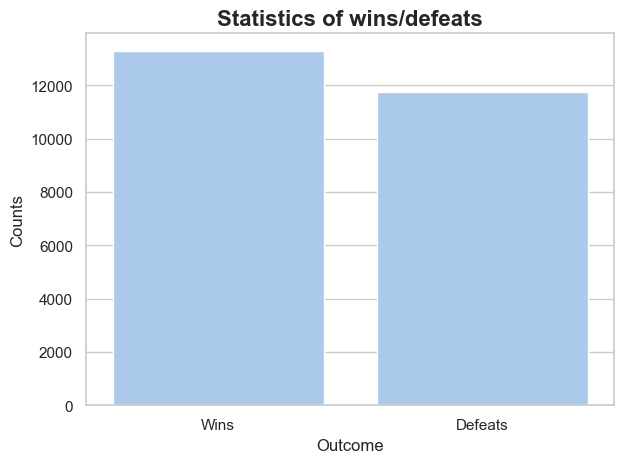

In [ ]:
# Create a bar plot for wins and defeats
sns.barplot(data=df_wins_defeats, x='Outcome',y='Count')
plt.title("Statistics of wins/defeats", fontdict={'fontsize': 16, 'fontweight': 'bold'})

plt.xlabel("Outcome")
plt.ylabel("Counts")
#plt.legend(title="Legend Title")
plt.tight_layout() 
plt.show()

In [ ]:
# Print the win and defeat rates
print(f"Win rate: {prop_wins:.0%}")
print(f"Defeat rate: {prop_defeats:.0%}")

Win rate: 53%
Defeat rate: 47%


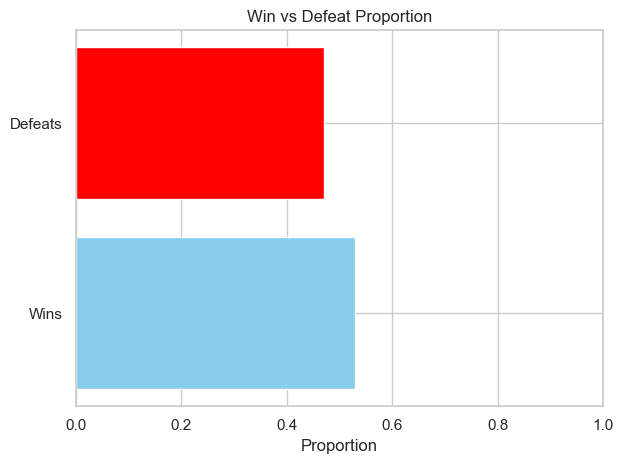

In [ ]:
# Create a horizontal bar plot for win vs defeat proportion
plt.barh(['Wins', 'Defeats'], [prop_wins, prop_defeats], color=['skyblue', 'red'])
plt.xlabel('Proportion')
plt.title('Win vs Defeat Proportion')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

### Count difficulty lvl 


In [ ]:
 # Count the occurrences of each difficulty level

dif = df['Difficulty'].value_counts()

easy_dif = dif.get('easy', 0)
medium_dif = dif.get('medium', 0)
hard_dif = dif.get('hard', 0)

In [ ]:
# Convert Series to DataFrame
dif_df = dif.reset_index()
dif_df.columns = ['Difficulty', 'Count']

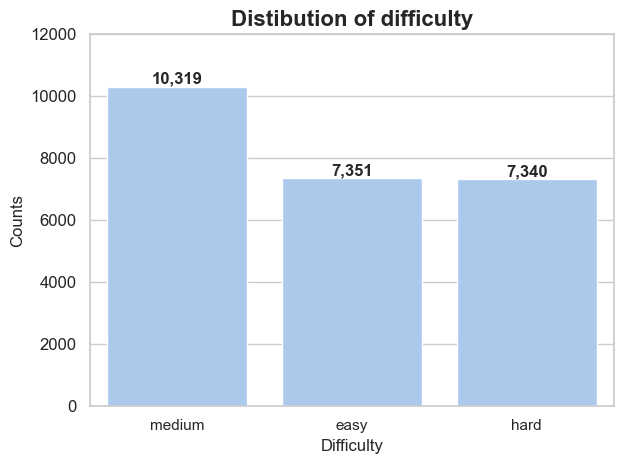

In [ ]:
# Create a bar plot for difficulty distribution
ax = sns.barplot(data=dif_df, x='Difficulty',y='Count')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height, 
        f'{int(height):,}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.title("Distibution of difficulty", fontdict={'fontsize': 16, 'fontweight': 'bold'})

plt.xlabel("Difficulty")
plt.ylabel("Counts")
plt.ylim(0, 12000)
plt.yticks(fontsize=12)
#plt.legend(title="Legend Title")
plt.tight_layout() 
plt.show()

In [ ]:
# Calculate the winrate for each difficulty level
grouped_dif_winrate = df.groupby('Difficulty')['Completed'].mean().round(2).reset_index(name='Winrate')

grouped_dif_winrate['Difficulty'] = pd.Categorical(
    grouped_dif_winrate['Difficulty'],
    categories=['easy', 'medium', 'hard'],
    ordered=True
)

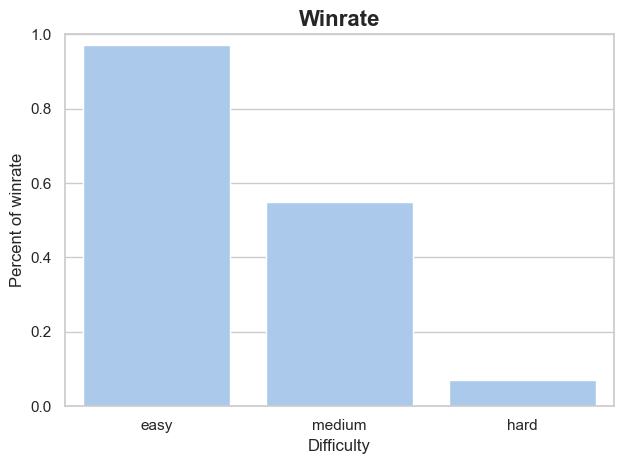

In [ ]:
# Show the winrate for each difficulty level
# Create a bar plot for winrate
sns.barplot(data=grouped_dif_winrate,
            x='Difficulty',
            y='Winrate',
            )
plt.title('Winrate', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Difficulty')
plt.ylabel('Percent of winrate')
plt.ylim(0,1)
plt.tight_layout() 
plt.show()

In [ ]:
# Create a DataFrame for difficulty and completion status

grouped_dif_completed = df.groupby(['Difficulty', 'Completed']).size().reset_index(name='Count')
grouped_dif_completed['Difficulty'] = pd.Categorical(
    grouped_dif_completed['Difficulty'],
    categories=['easy', 'medium', 'hard'],
    ordered=True
)


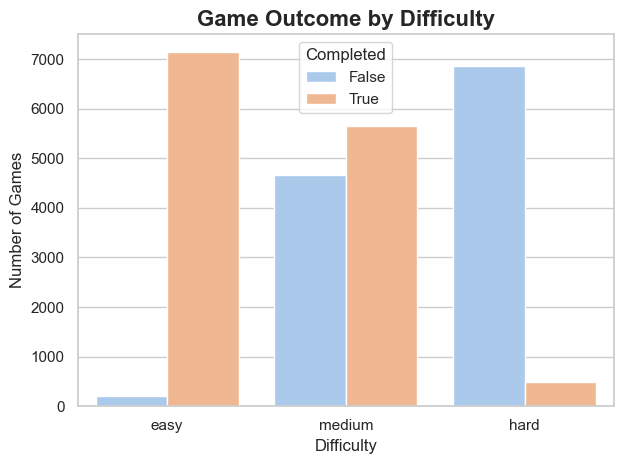

In [ ]:
# Create a bar plot for game outcome by difficulty
x = sns.barplot(
    data=grouped_dif_completed,
    x='Difficulty',
    y='Count',
    hue='Completed',     
    palette='pastel'
)

plt.title("Game Outcome by Difficulty", fontsize=16, fontweight='bold')
plt.xlabel("Difficulty")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average score for each difficulty level
# Create a DataFrame for average score by difficulty
grouped_dif_score = df.groupby('Difficulty')['Score'].mean().round(2)
grouped_dif_score

Difficulty
easy      8.44
hard      3.11
medium    6.36
Name: Score, dtype: float64

In [ ]:
# Aggregate statistics for each difficulty level
# A DataFrame with multiple statistics for each difficulty level
dif_agg = df.groupby('Difficulty').agg({
    'Score':['mean', 'median', 'min', 'max'],
    'Wrong': ['mean', 'median'],
    'Accuracy_attempted': ['mean', 'median'],
    'Attempted': ['mean', 'min', 'max'],
    'Completed': ['mean', 'sum', 'count'],
    'Max_streak': ['mean', 'median', 'min', 'max']})

In [27]:
dif_agg

Score                    Wrong        Accuracy_attempted  \
                mean median min max      mean median               mean   
Difficulty                                                                
easy        8.440076    9.0   1  10  1.505237    1.0           0.844941   
hard        3.109264    3.0   0  10  1.955995    2.0           0.434726   
medium      6.361857    7.0   0  10  2.318345    3.0           0.669016   

                  Attempted         Completed              Max_streak         \
           median      mean min max      mean   sum  count       mean median   
Difficulty                                                                     
easy          0.9  9.974017   6  10  0.971296  7140   7351   6.560740    6.0   
hard          0.5  5.999319   3  10  0.065940   484   7340   2.541689    2.0   
medium        0.7  9.131990   4  10  0.548212  5657  10319   4.621959    4.0   

                    
           min max  
Difficulty          
easy         1  10  
hard         0  10  
medium       0  10

/var/folders/fj/8n7rcf2d6wjffyl_fphfsnl00000gn/T/ipykernel_10172/1562159666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df,
/var/folders/fj/8n7rcf2d6wjffyl_fphfsnl00000gn/T/ipykernel_10172/1562159666.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df,
/var/folders/fj/8n7rcf2d6wjffyl_fphfsnl00000gn/T/ipykernel_10172/1562159666.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df,
/var/folders/fj/8n7rcf2d6wjffyl_fphfsnl00000gn/T/ipykernel_10172/1562159666.py:27: FutureWarning: 

Passing `palette` without as

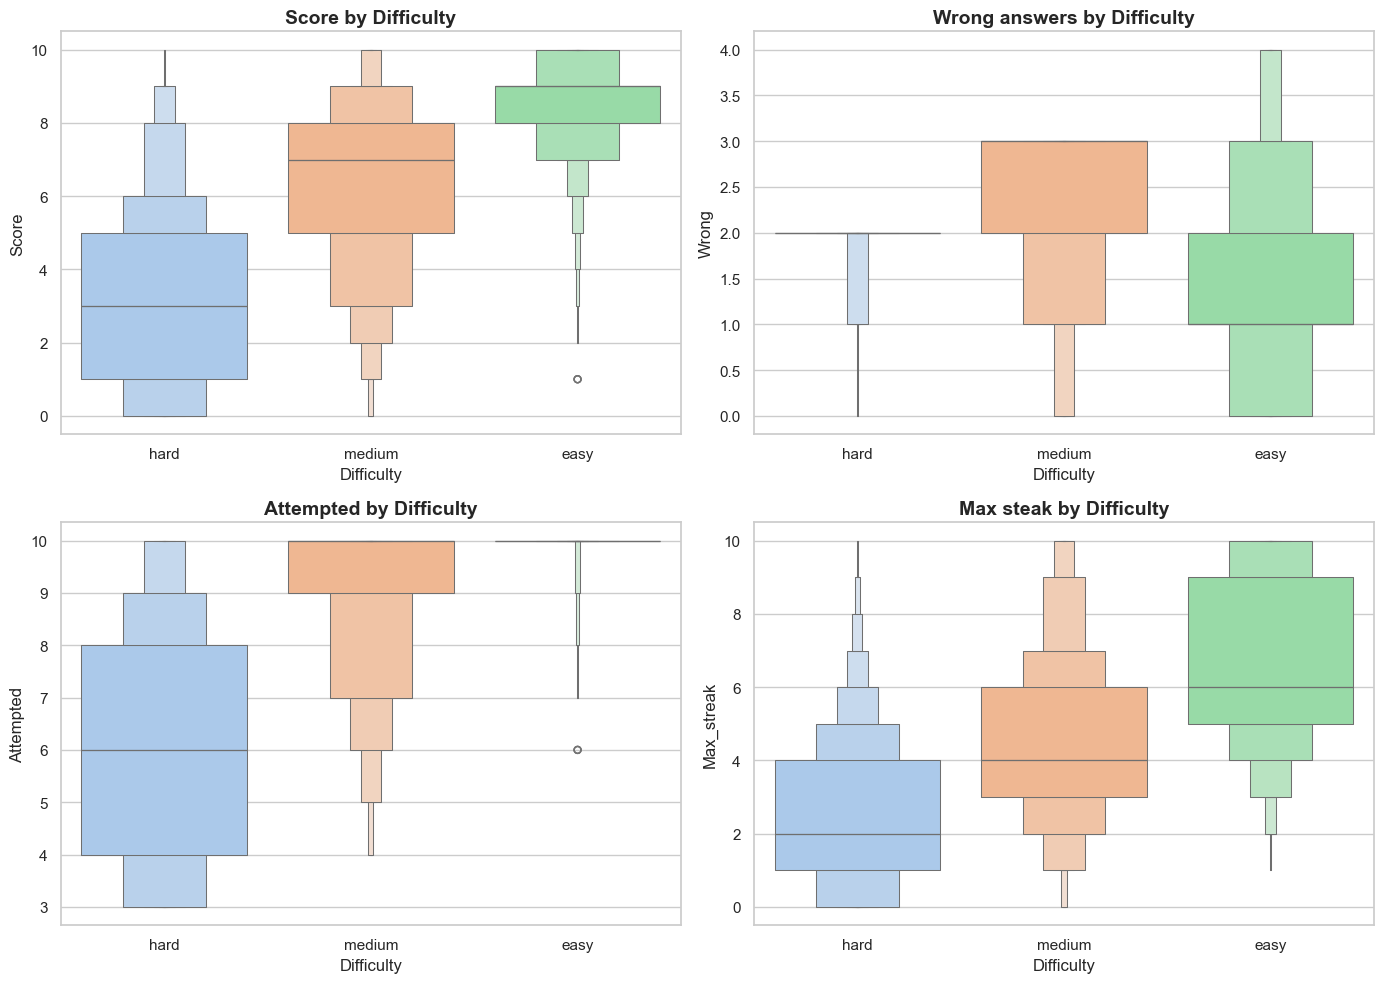

In [40]:
fig, axes = plt.subplots(2 ,2, figsize=(14,10))

sns.boxenplot(data=df,
              x='Difficulty',
              y='Score',
              palette='pastel',
              ax=axes[0,0]
              )
axes[0, 0].set_title('Score by Difficulty', fontsize=14, fontweight='bold')

sns.boxenplot(data=df,
              x='Difficulty',
              y='Wrong',
              palette='pastel',
              ax=axes[0,1]
              )
axes[0, 1].set_title('Wrong answers by Difficulty', fontsize=14, fontweight='bold')

sns.boxenplot(data=df,
              x='Difficulty',
              y='Attempted',
              palette='pastel',
              ax=axes[1,0]
              )
axes[1, 0].set_title('Attempted by Difficulty', fontsize=14, fontweight='bold')

sns.boxenplot(data=df,
              x='Difficulty',
              y='Max_streak',
              palette='pastel',
              ax=axes[1,1]
              )
axes[1, 1].set_title('Max steak by Difficulty', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()